In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
df=pd.read_csv("water_potability.csv")

In [3]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [4]:
dfr=df[df['Potability']==1]
dfr['Potability']

250     1
251     1
252     1
253     1
254     1
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 1278, dtype: int64

In [5]:
dfl=df[df['Potability']==0]
dfno=df.dropna()
cols=list(dfr.columns)

In [6]:
def change(water_right,column, upper_limit,lis,lower_limit):
    for i in range(len(water_right)):
        x = water_right.iloc[i:i+1][column].values[0]
        if (x> upper_limit):
            lis[i] = 0
        if(column=='ph'):
            if(x<lower_limit):
                lis[i] = 0
    return lis

In [7]:
for_df = []

In [43]:
lis = dfr['Potability'].values
lis1 = dfr['Potability'].values
for i in cols:
    perc25 = dfr[i].quantile(0.25)
    perc75 = dfr[i].quantile(0.75)
    iqr = perc75 - perc25
    upper_limit = perc75 + 1.5* iqr
    lower_limit = perc25 - 1.5 * iqr
    lis = change(dfr,i,upper_limit, lis, lower_limit)
print(lis)


[1 1 1 ... 1 1 1]


In [9]:
for i in range(len(cols)-1):
    for_df.append(dfr[cols[i]].values)
for_df

[array([9.44512984, 9.02484504,        nan, ..., 9.41951032, 5.12676292,
        7.87467136]),
 array([145.80540245, 128.09669121, 169.97484896, ..., 175.7626463 ,
        230.60375751, 195.10229859]),
 array([13168.52915568, 19859.6764758 , 23403.63730437, ...,
        33155.57821831, 11983.86937634, 17404.17706105]),
 array([9.44447109, 8.01642265, 8.51972985, ..., 7.35023323, 6.30335653,
        7.50930586]),
 array([310.58337386, 300.15037702,          nan, ...,          nan,
                 nan,          nan]),
 array([592.65902098, 451.14348101, 475.57356243, ..., 432.04478305,
        402.88311312, 327.45976046]),
 array([ 8.60639675, 14.77086294, 12.92410682, ..., 11.03906969,
        11.16894622, 16.14036763]),
 array([77.57745951, 73.77802565, 50.86191298, ..., 69.84540029,
        77.4882131 , 78.69844633]),
 array([3.87516525, 3.98525051, 2.747313  , ..., 3.2988755 , 4.70865847,
        2.30914906])]

In [10]:
Df = pd.DataFrame()

In [11]:
for i in cols:
    Df[i] = dfr[i]
Df['Potability'] = lis
Df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
250,9.445130,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1
251,9.024845,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1
252,NaN,169.974849,23403.637304,8.519730,NaN,475.573562,12.924107,50.861913,2.747313,1
253,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1
254,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,0
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [12]:
final_df=pd.concat([dfl, Df])

In [13]:
fdf1=final_df[final_df['Potability']==1]
fdf2=final_df[final_df['Potability']==0]

In [14]:
df1 = Df.dropna()
df2=df1[df1['Potability']==1]

In [15]:
for i in cols:
    fdf1[i].fillna(df2[i].mean(), inplace = True)

C:\Users\nagamytreya\AppData\Local\Temp\ipykernel_11244\3116846447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf1[i].fillna(df2[i].mean(), inplace = True)


In [16]:
fdf1

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
250,9.445130,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1
251,9.024845,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1
252,7.085586,169.974849,23403.637304,8.519730,333.023122,475.573562,12.924107,50.861913,2.747313,1
253,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1
254,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1
...,...,...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
3272,7.808856,193.553212,17329.802160,8.061362,333.023122,392.449580,19.903225,66.385034,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.023122,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.023122,402.883113,11.168946,77.488213,4.708658,1


In [17]:
for i in cols:
    cx = dfl[i].max()
    print(cx)
    fdf2[i].fillna(float(cx), inplace = True)

C:\Users\nagamytreya\AppData\Local\Temp\ipykernel_11244\1393506431.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf2[i].fillna(float(cx), inplace = True)


13.999999999999998
304.23591211231667
61227.19600771213
12.653362021943142
460.1070689926536
753.3426195583046
28.30000000000001
120.03007700530677
6.739
0


In [18]:
fdf2

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,14.000000,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,460.107069,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,460.107069,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3236,4.767472,256.449917,48007.868134,5.773180,460.107069,590.429550,16.541561,44.938586,3.893378,0
3246,10.667364,173.381945,28912.202201,7.071294,276.634391,286.063394,17.685651,55.147364,4.135569,0
3249,10.808157,198.596751,29614.348790,5.782418,304.622061,383.269410,14.902820,47.896406,4.362542,0
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,0


In [19]:
df = pd.concat([fdf1,fdf2],ignore_index=True)
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,9.445130,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1
1,9.024845,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1
2,7.085586,169.974849,23403.637304,8.519730,333.023122,475.573562,12.924107,50.861913,2.747313,1
3,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1
4,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1
...,...,...,...,...,...,...,...,...,...,...
3271,4.767472,256.449917,48007.868134,5.773180,460.107069,590.429550,16.541561,44.938586,3.893378,0
3272,10.667364,173.381945,28912.202201,7.071294,276.634391,286.063394,17.685651,55.147364,4.135569,0
3273,10.808157,198.596751,29614.348790,5.782418,304.622061,383.269410,14.902820,47.896406,4.362542,0
3274,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,0


In [20]:
x = df.drop(['Potability'],axis=1)
y = df['Potability']

# Logistic Regression

In [21]:
# o=[]
# for i in range(1,100):
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=84)
logi = LogisticRegression()
logi.fit(x_train,y_train)
y_pred2=logi.predict(x_test)
acc=accuracy_score(y_test,y_pred2)
acc
# o.append(acc)
# print(max(o),o.index(max(o)))

C:\Users\nagamytreya\Python programmes\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6388606307222787

In [22]:
import pickle
pickle_out=open("logistic.pkl","wb")
pickle.dump(logi,pickle_out)
pickle_out.close()

In [23]:
# predlogi_y = logi.predict(np.array([5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708]).reshape(1,9))


In [24]:
pt=PowerTransformer(method='box-cox')
x_train_transformed=pt.fit_transform(x_train+0.00001)
x_test_transformed=pt.transform(x_test+0.00001)
pd.DataFrame({'cols':x_train.columns,'box_cox_lambdas':pt.lambdas_})


,cols,box_cox_lambdas
0,ph,0.396675
1,Hardness,1.055700
2,Solids,0.506532
3,Chloramines,1.026965
4,Sulfate,-0.006366
5,Conductivity,0.448757
6,Organic_carbon,1.011886
7,Trihalomethanes,0.713252
8,Turbidity,0.959632


# Random Forest

In [25]:
r=[]
for i in range(1,100):
    RFC = RandomForestClassifier(max_depth=9,n_estimators=480)
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=i)
    RFC.fit(x_train,y_train)
    y_RFC = RFC.predict(x_test)
    r.append(accuracy_score(y_test, y_RFC))
print(max(r),r.index(max(r)))

0.8323170731707317 2


In [45]:
import pickle
pickle_out=open("clsfr.pkl","wb")
pickle.dump(RFC,pickle_out)
pickle_out.close()

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       441
           1       0.62      0.74      0.68       215

    accuracy                           0.77       656
   macro avg       0.74      0.76      0.75       656
weighted avg       0.78      0.77      0.77       656

Accuracy: 0.7682926829268293


<AxesSubplot:>

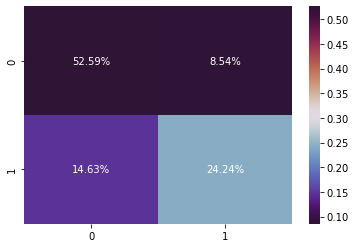

In [27]:
print(classification_report(y_RFC,y_test))
cmr= confusion_matrix(y_test,y_RFC)
Acc_rfc= accuracy_score(y_RFC,y_test)
print( 'Accuracy:',Acc_rfc)
sns.heatmap(cmr/np.sum(cmr), annot= True, fmt= '0.2%', cmap= 'twilight_shifted')


In [28]:
np.mean(cross_val_score(RandomForestClassifier(max_samples=0.75),x,y,cv=19,scoring='accuracy'))

0.7878499515356477

In [29]:
n_estimators=[20,60,100,120]
max_features=[0.2,0.6,1.0]
max_depth=[2,8,None]
max_samples=[0.5,0.75,1.0]

In [30]:
param_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'max_samples':max_samples}
param_grid

{'n_estimators': [20, 60, 100, 120],
 'max_features': [0.2, 0.6, 1.0],
 'max_depth': [2, 8, None],
 'max_samples': [0.5, 0.75, 1.0]}

In [31]:
rf_grid=GridSearchCV(estimator=RFC,param_grid=param_grid,cv=5,verbose=2,n_jobs=-1)

In [33]:
n_estimators=[20,60,100,120]
max_features=[0.2,0.6,1.0]
max_depth=[2,8,None]
max_samples=[0.5,0.75,1.0]
bootstrap=[True,False]
min_samples_split=[2,5]
min_samples_leaf=[1,2]

In [34]:
param_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'max_samples':max_samples,
            'bootstrap':bootstrap,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}
param_grid

{'n_estimators': [20, 60, 100, 120],
 'max_features': [0.2, 0.6, 1.0],
 'max_depth': [2, 8, None],
 'max_samples': [0.5, 0.75, 1.0],
 'bootstrap': [True, False],
 'min_samples_split': [2, 5],
 'min_samples_leaf': [1, 2]}

In [35]:
rf_grid=RandomizedSearchCV(estimator=RFC,param_distributions=param_grid,cv=5,verbose=2,n_jobs=-1)

# XGBoost

In [36]:
# l=[]
# for i in range(1,100):
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=54)
Xgb = XGBClassifier(max_depth=8,n_estimators=43)
Xgb.fit(x_train,y_train)
pred_Xgb =Xgb.predict(x_test)
Xgb_ACC = accuracy_score(y_test,pred_Xgb)
Xgb_ACC
# l.append(Xgb_ACC)
# print(max(l),l.index(max(l)))

0.8246951219512195

In [37]:
import pickle
pickle_out=open("xgb.pkl","wb")
pickle.dump(Xgb,pickle_out)
pickle_out.close()

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       423
           1       0.79      0.70      0.74       233

    accuracy                           0.82       656
   macro avg       0.81      0.80      0.80       656
weighted avg       0.82      0.82      0.82       656



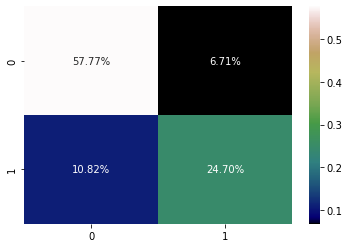

In [38]:
cmx = confusion_matrix(y_test,pred_Xgb)
sns.heatmap(cmx/np.sum(cmx), annot= True, fmt= '0.2%', cmap= 'gist_earth')
print(classification_report(y_test, pred_Xgb))

In [39]:
# rf_grid=RandomizedSearchCV(estimator=Xgb,param_distributions=param_grid,cv=5,verbose=2,n_jobs=-1)

In [40]:
pred_Xgb =Xgb.predict(x_test)

In [41]:
his=[]
for i in range(1,100,3):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=97)
    Xgb = XGBClassifier(max_depth=i,n_estimators=420)
    Xgb.fit(x_train,y_train)
    y_pred = Xgb.predict(x_test)
    his.append(float(accuracy_score(y_test,y_pred)))
print(his.index(max(his)))
print(max(his))
accuracy_score(y_test,y_pred)

1
0.801829268292683


0.8003048780487805